In [23]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 20)

# naložimo razpredelnico, s katero bomo delali
london = pd.read_csv('LONDON.csv')

c:\program files (x86)\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
london.head(10)

,friday,hotelId,price
0,2017-02-03,537268,450
1,2017-02-03,18561,200
2,2017-02-03,28146,472
3,2017-02-03,21688,124
4,2017-02-03,8466215,200
5,2017-02-03,15246530,169
6,2017-02-03,20098,539
7,2017-02-03,5169,284
8,2017-02-03,3849185,586
9,2017-02-03,8563,358


In [25]:
is_efn = london["hotelId"] == 21688
london[is_efn].count()
london.groupby("hotelId")
london['price']

0       450
1       200
2       472
3       124
4       200
5       169
6       539
7       284
8       586
9       358
10      136
11      206
12      174
13      270
14      231
15      238
16      189
17      144
18      205
19      140
20      157
21      216
22      195
23      300
24      235
25      297
26      205
27      230
28      161
29      299
       ... 
9570    179
9571    205
9572    332
9573    135
9574    250
9575    113
9576    361
9577    222
9578    385
9579    301
9580    198
9581    119
9582    133
9583    178
9584    155
9585    222
9586    234
9587    145
9588    177
9589    119
9590    150
9591    134
9592     80
9593    202
9594    154
9595    144
9596    115
9597    519
9598    114
9599    206
Name: price, dtype: int64

In [26]:
london[london.price >= 546]

,friday,hotelId,price
8,2017-02-03,3849185,586
36,2017-02-03,438636,564
57,2017-02-03,21208,753
74,2017-02-03,21364,642
76,2017-02-03,8035714,647
89,2017-02-03,27158,585
95,2017-02-03,8171297,592
111,2017-02-03,1112611,659
143,2017-02-03,1653152,576
185,2017-02-03,15588,1022


In [27]:
london[london.price < 70]

,friday,hotelId,price
3757,2017-06-09,10186970,66
4079,2017-06-23,10186970,67
7978,2017-11-03,6882056,62
9376,2017-12-22,1050347,63


In [36]:
hotels = pd.read_csv('LONDON_Hoteli.csv')
hotels

,hotelId,name,proximityDistance,guestRating,freeCancellation,shortDescription
0,537268,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
1,18561,The Kensington Hotel,3.88,4.5,False,Located in South Kensington; this luxury hotel...
2,28146,The Ritz London,0.97,4.6,True,This seven-story London hotel is centrally loc...
3,21688,K+K Hotel George London,4.96,4.4,False,Built in 1897 as terrace homes; this hotel in ...
4,8466215,Mondrian London,1.45,4.6,False,Located in London City Centre; this luxury hot...
5,15246530,Apartment Wharf - Discovery Dock West,7.53,0.0,False,Located in Canary Wharf; this apartment is wit...
6,20098,Four Seasons Hotel London at Park Lane,1.59,4.9,True,This family-friendly London hotel is located i...
7,5169,Amba Hotel Charing Cross,0.23,4.9,False,Located in Soho; this hotel is within a 5-minu...
8,3849185,Corinthia Hotel London,0.25,4.9,True,Located in London City Centre; this luxury hot...
9,8563,Taj 51 Buckingham Gate Suites and Residences,1.18,4.8,True,This 5-star London townhouse hotel is within w...


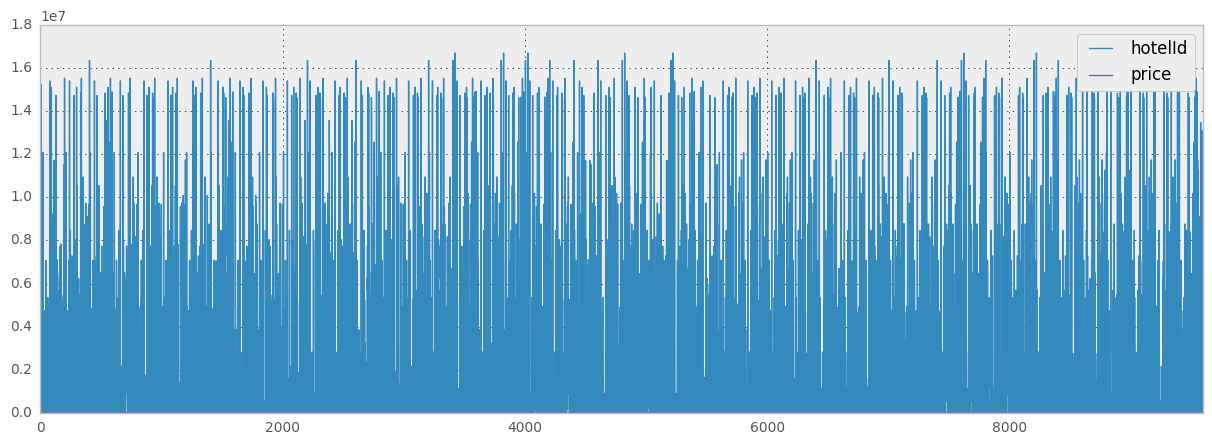

In [29]:
london.plot()

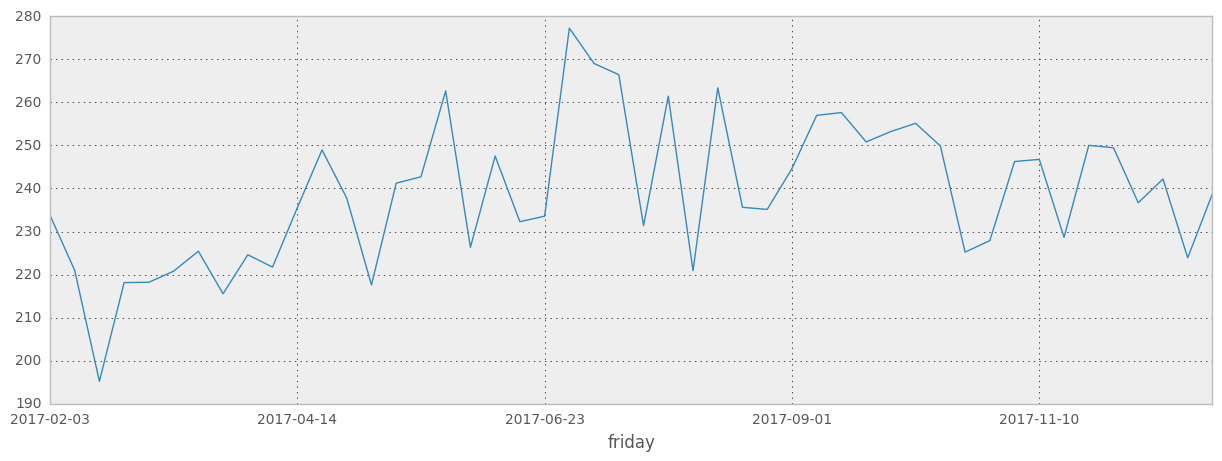

In [37]:
london_by_dates = london.groupby("friday")
london_by_dates["price"].mean().plot()

In [31]:
london.sort("price")

c:\program files (x86)\python35-32\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,friday,hotelId,price
7978,2017-11-03,6882056,62
9376,2017-12-22,1050347,63
3757,2017-06-09,10186970,66
4079,2017-06-23,10186970,67
9348,2017-12-22,1381443,70
9306,2017-12-22,14264,71
8920,2017-12-08,10186970,73
7397,2017-10-13,10186970,73
8769,2017-12-01,10186970,73
4920,2017-07-21,10186970,73


In [32]:
#sorted_by_price = london.sort_values('price')

In [33]:
#cheapest = sorted_by_price[:200]
#most_expensive = sorted_by_price[len(sorted_by_price)-200:]

In [34]:
cheapest


,friday,hotelId,price
7978,2017-11-03,6882056,62
9376,2017-12-22,1050347,63
3757,2017-06-09,10186970,66
4079,2017-06-23,10186970,67
9348,2017-12-22,1381443,70
9306,2017-12-22,14264,71
8920,2017-12-08,10186970,73
7397,2017-10-13,10186970,73
8769,2017-12-01,10186970,73
4920,2017-07-21,10186970,73


In [38]:
most_expensive_merged = most_expensive.merge(hotels, on 'hotelID')
#merged = csv1.merge(csv2, on='id')

SyntaxError: invalid syntax (<ipython-input-38-3f40670c37e9>, line 1)

In [41]:
merged = london.merge(hotels, on= 'hotelId')
sorted_by_price = merged.sort_values('price')
cheapest = sorted_by_price[:200]
most_expensive = sorted_by_price[len(sorted_by_price)-200:]
merged

,friday,hotelId,price,name,proximityDistance,guestRating,freeCancellation,shortDescription
0,2017-02-03,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
1,2017-02-10,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
2,2017-02-17,537268,501,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
3,2017-02-24,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
4,2017-03-03,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
5,2017-03-10,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
6,2017-03-17,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
7,2017-03-24,537268,531,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
8,2017-03-31,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
9,2017-04-07,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...


In [43]:
cheapest.mean()

hotelId              4337316.905
price                     84.335
proximityDistance          3.985
guestRating                3.514
freeCancellation           0.125
dtype: float64

In [44]:
most_expensive.mean()

hotelId              838893.1450
price                   761.7300
proximityDistance         1.2001
guestRating               4.7545
freeCancellation          0.9900
dtype: float64

In [45]:
#Analysis:
#200 the cheapest hotels are on average 2,8 km more away from the centre
#
#
#
#

In [46]:
cheapest.sort_values(['friday'], ascending=[True])

,friday,hotelId,price,name,proximityDistance,guestRating,freeCancellation,shortDescription
5701,2017-02-03,5173526,92,Tune Hotel Kings Cross London,2.43,3.7,False,Tune Hotel Kings Cross places guests a 5-minut...
6932,2017-02-10,10546518,91,Columbia Hotel,3.64,3.5,True,Located in London City Centre; this hotel is w...
7119,2017-02-10,582415,80,Garden View Hotel,5.10,3.4,False,Victorian property overlooking a tranquil gard...
5702,2017-02-10,5173526,94,Tune Hotel Kings Cross London,2.43,3.7,False,Tune Hotel Kings Cross places guests a 5-minut...
8147,2017-02-10,914141,78,My Place Hotel,4.88,3.1,True,Located in London City Centre; this hotel is w...
7303,2017-02-10,1886693,88,The Re London Shoreditch,5.30,3.9,False,Located in Hackney; this hotel is within 3 mi ...
8298,2017-02-10,9103555,89,Tower Bridge London Apartments,3.51,3.5,False,Located in London City Centre; this apartment ...
8148,2017-02-17,914141,78,My Place Hotel,4.88,3.1,True,Located in London City Centre; this hotel is w...
8595,2017-02-17,2541981,82,Wardonia,2.38,3.4,False,Located in London City Centre; this hotel is w...
8255,2017-02-17,14264,84,ibis London Earls Court,5.53,3.7,False,Located in London City Centre; this hotel is w...
